In [1]:
import json
import zlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from analysis_funcs import calculate_similarity_and_plot, stringify_test_cases, stringify_test_titles, calculate_pairwise_ncd, plot_heatmaps, list_clusters, true_clusters, kmeans_clustering

In [2]:
data_file = './data/jekyll/jekyll_parsed_steps.json'

with open(data_file, 'r') as f:
    test_data = json.load(f)

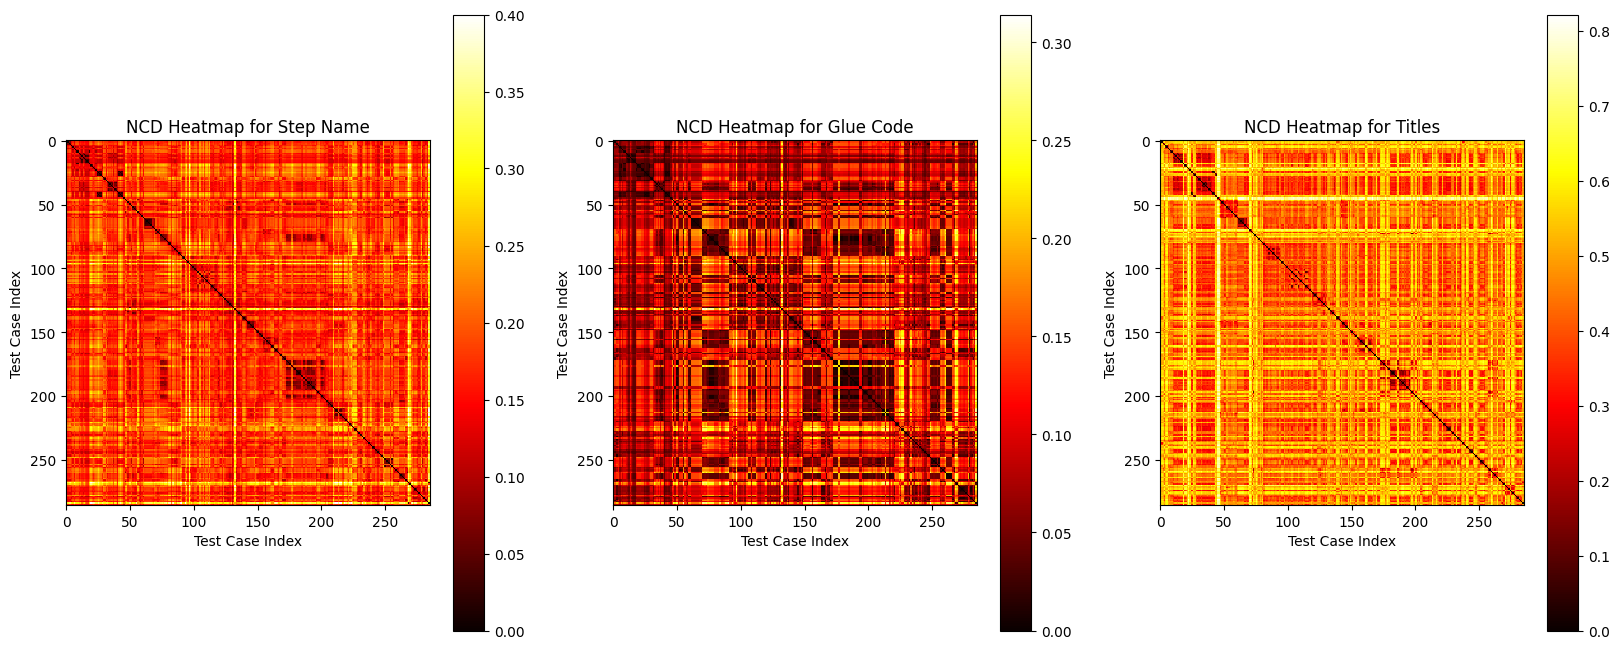

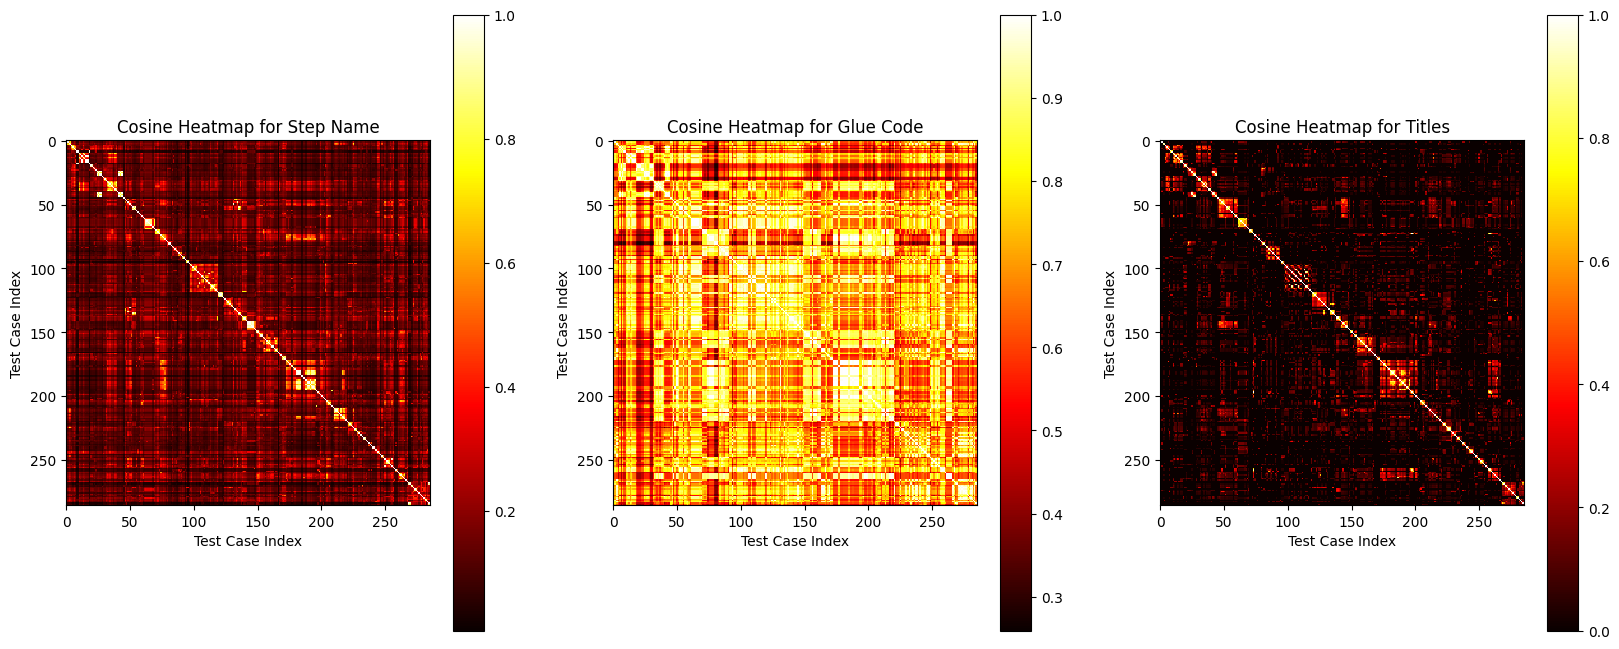

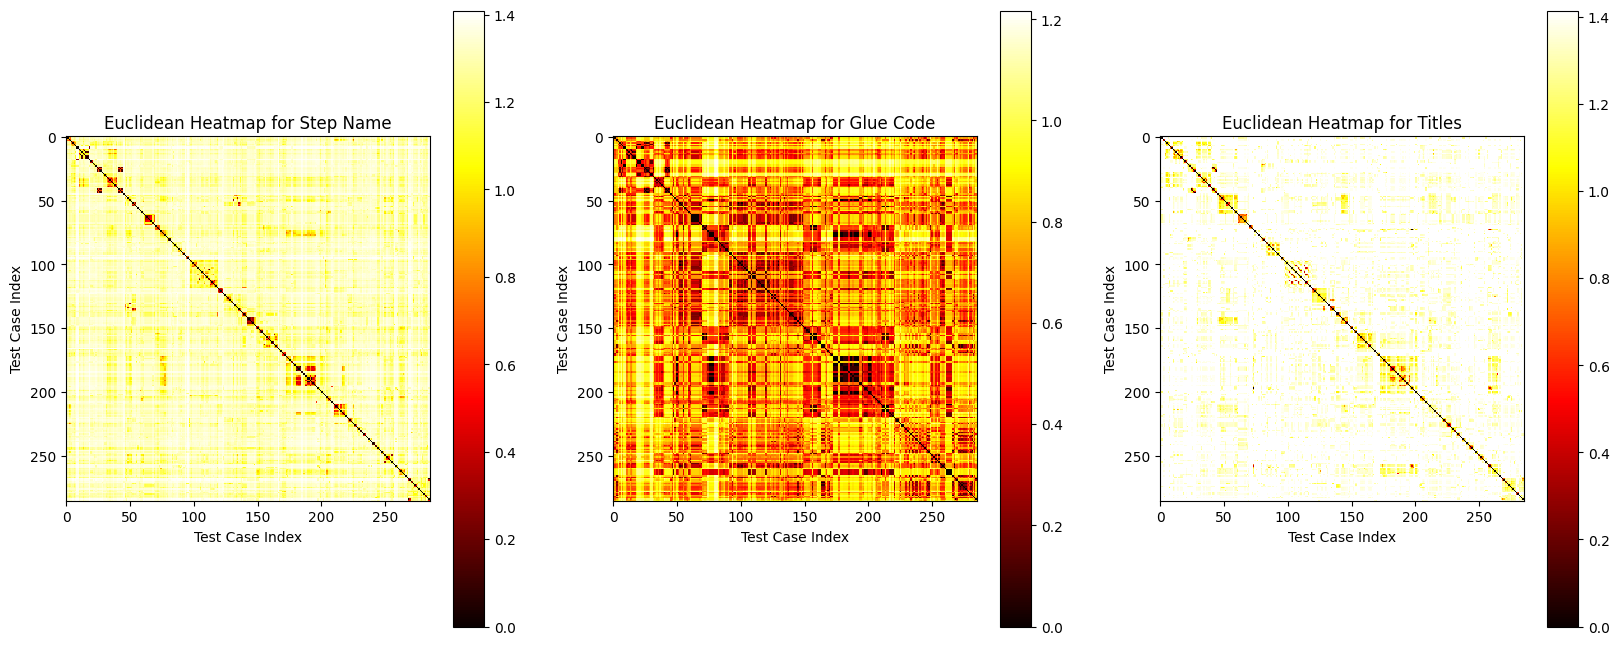

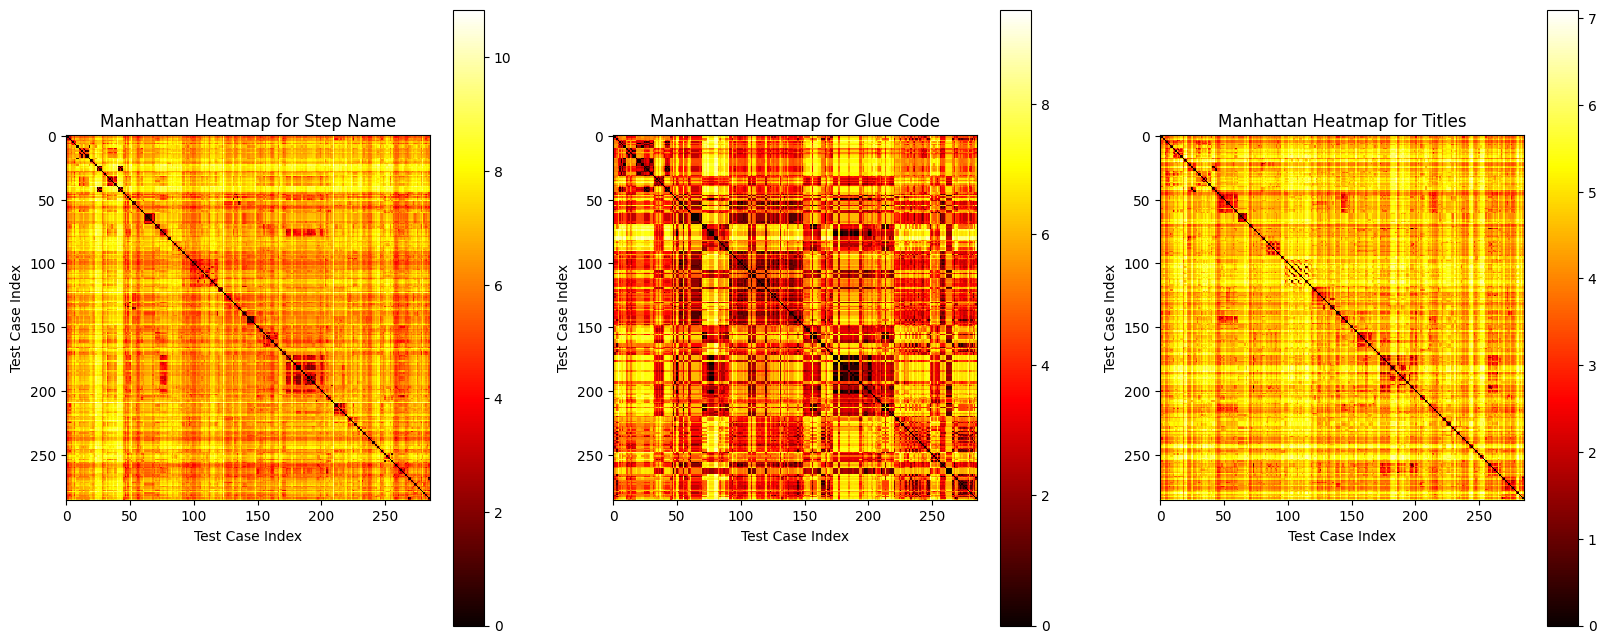

F-score for NCD: 0.07008647917738826
F-score for Cosine Similarity: 0.005994005994005994
F-score for Euclidean Distance: 0.007758053911900066
F-score for Manhattan Distance: 0.003885003885003885


In [3]:
calculate_similarity_and_plot(data_file)

In [3]:
step_definition_strings = stringify_test_cases(test_data, "step_definition")

In [4]:
step_name_strings = stringify_test_cases(test_data, "step_name")

In [5]:
scenario_nums, scenario_title_strings = stringify_test_titles(test_data)

In [6]:
step_name_ncd_matrix = calculate_pairwise_ncd(step_name_strings)
step_definition_ncd_matrix = calculate_pairwise_ncd(step_definition_strings)
scenario_title_ncd_matrix = calculate_pairwise_ncd(scenario_title_strings)

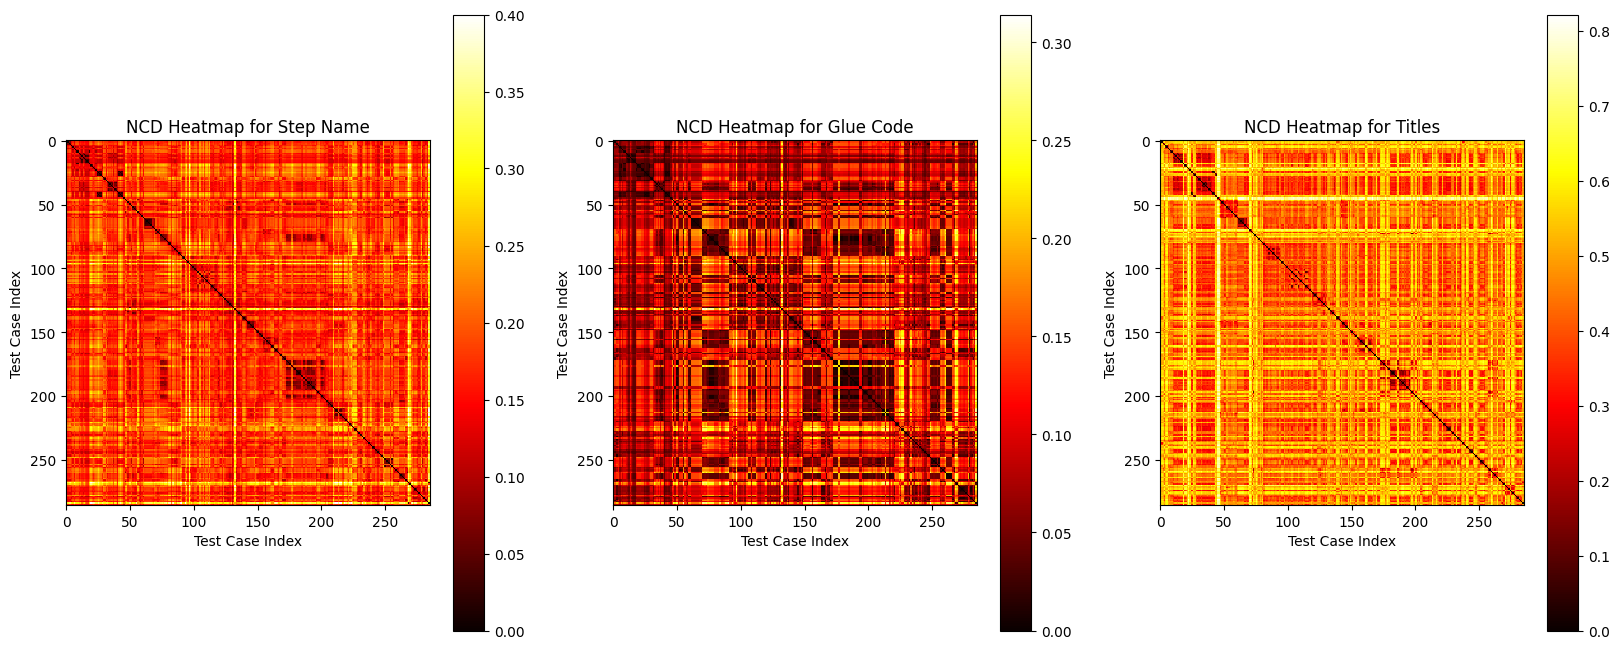

In [7]:
plot_heatmaps(step_name_ncd_matrix, step_definition_ncd_matrix, scenario_title_ncd_matrix, type="NCD")

In [8]:
num_clusters = 28
test_clusters = true_clusters(test_data)
step_clusters = kmeans_clustering(step_name_ncd_matrix, num_clusters, scenario_title_strings)

In [9]:
list_clusters(test_clusters)


Cluster cache.feature:
  - Default Cache directory
  - Custom Cache directory
  - Disk usage in safe mode
  - Disabling disk usage in non-safe mode

Cluster collections.feature:
  - Unrendered collection
  - Rendered collection
  - Rendered collection at a custom URL
  - Rendered document in a layout
  - Collections specified as an array
  - Collections specified as an hash
  - Rendered collection with document with future date
  - Access rendered collection with future dated document via Liquid
  - Access rendered and published collection documents via Liquid
  - Unrendered collection with future dated document
  - Access unrendered collection with future dated document via Liquid
  - Access unrendered but publishable collection documents via Liquid
  - Access rendered collection with future date and unpublished flag via Liquid
  - Access unrendered collection with future date and unpublished flag via Liquid
  - All the documents
  - Documents have an output attribute, which is the c

In [10]:
list_clusters(step_clusters)


Cluster 0:
  - Basic site with a post
  - Run some code after site reset
  - Alter the payload for certain posts
  - Modify post contents before writing to disk
  - Work with a post after writing it to disk
  - Use per-post permalink
  - Use per-post ending in .html
  - Use page.path variable
  - Cannot override page.path variable

Cluster 1:
  - Rendered collection with document with future date
  - Rendered collection in custom collections_dir also containing posts
  - Rendered collection in custom collections_dir with posts at the site root
  - Rendered collection in custom collections_dir also containing drafts
  - Rendered collection in custom collections_dir with drafts at the site root
  - Rendered collection with a document that includes a relative document
  - Rendered collection in custom collections_dir with a document that includes a relative document
  - Modify the converted HTML content of a page before rendering layout
  - Modify the converted HTML content of a post bef